<a href="https://colab.research.google.com/github/jcmachicao/MachineLearningAvanzado_UC_2025/blob/main/U4___demo_RL_FrozenLake.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reinforcement Learning: FrozenLake v0 Gym
Create a reinforcement learning demonstration using Gym or another base, visualizing the model's learning process through heatmaps of its parameters across different epochs. The goal is to show students how the model learns over time by observing the changes in the parameter heatmaps.

El entorno FrozenLake-v1 tiene una cuadrícula de 4x4 que representa diferentes estados. Los estados están indexados de 0 a 15, comenzando desde la esquina superior izquierda y moviéndose horizontalmente. Las acciones posibles son: 0 (Izquierda), 1 (Abajo), 2 (Derecha), 3 (Arriba).

## Instalación de librerías


In [ ]:
!pip install gym numpy matplotlib

## Configuración del entorno gym

### Subtask:
Configurar un entorno simple de Gym para el ejemplo.


**Reasoning**:
Import the gym library, create an instance of the 'FrozenLake-v1' environment, reset it, and print the observation and action spaces.



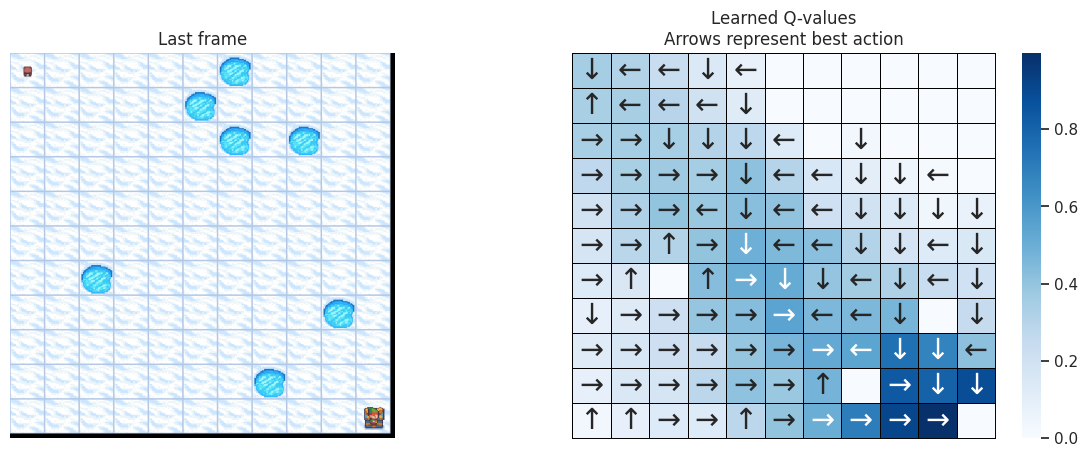

In [2]:
import gym

# Create an instance of the FrozenLake-v1 environment
env = gym.make('FrozenLake-v1')

# Reset the environment to its initial state
initial_state = env.reset()

# Print the observation space and action space
print("Observation Space:", env.observation_space)
print("Action Space:", env.action_space)

Observation Space: Discrete(16)
Action Space: Discrete(4)


Gym has been unmaintained since 2022 and does not support NumPy 2.0 amongst other critical functionality.
Please upgrade to Gymnasium, the maintained drop-in replacement of Gym, or contact the authors of your software and request that they upgrade.
See the migration guide at https://gymnasium.farama.org/introduction/migration_guide/ for additional information.
/usr/local/lib/python3.12/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.12/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.12/dist-pack

## Definición del modelo simple

### Subtask:
Definir un modelo de aprendizaje por refuerzo simple (por ejemplo, Q-Learning tabular) adecuado para el entorno seleccionado.


**Reasoning**:
Determine the size of the Q-table based on the observation space and action space of the `env` object, initialize a NumPy array to represent the Q-table with all values set to zero, and define the learning rate, discount factor, and epsilon parameters for the Q-learning algorithm.



In [3]:
import numpy as np

# Determine the size of the Q-table
state_size = env.observation_space.n
action_size = env.action_space.n

# Initialize the Q-table with zeros
q_table = np.zeros((state_size, action_size))

# Define Q-learning parameters
alpha = 0.1  # Learning rate
gamma = 0.99  # Discount factor
epsilon = 1.0  # Exploration-exploitation trade-off
epsilon_decay_rate = 0.0001 # Epsilon decay rate
min_epsilon = 0.01 # Minimum epsilon value

print("Q-table shape:", q_table.shape)
print("Alpha:", alpha)
print("Gamma:", gamma)
print("Epsilon:", epsilon)
print("Epsilon decay rate:", epsilon_decay_rate)
print("Minimum epsilon:", min_epsilon)

Q-table shape: (16, 4)
Alpha: 0.1
Gamma: 0.99
Epsilon: 1.0
Epsilon decay rate: 0.0001
Minimum epsilon: 0.01


## Entrenamiento del modelo

### Subtask:
Entrenar el modelo durante un número determinado de épocas.


**Reasoning**:
Train the Q-learning model for a defined number of episodes, implementing the epsilon-greedy strategy for action selection and updating the Q-table using the Q-learning formula.



In [10]:
from numpy import bool_

In [22]:
num_episodes = 10000

for episode in range(num_episodes):
    state = env.reset()
    done = False
    while not done:
        # Epsilon-greedy strategy
        if np.random.uniform(0, 1) > epsilon:
            action = np.argmax(q_table[state,:]) # Exploitation
        else:
            action = env.action_space.sample() # Exploration

        # Take action and observe
        next_state, reward, done, info = env.step(action)

        # Q-learning update
        q_table[state, action] = q_table[state, action] + alpha * (reward + gamma * np.max(q_table[next_state,:]) - q_table[state, action])

        state = next_state

    # Epsilon decay
    epsilon = min_epsilon + (epsilon - min_epsilon) * np.exp(-epsilon_decay_rate * episode)

print("Training complete.")

Training complete.


## Almacenamiento de parámetros

### Subtask:
Almacenar los parámetros del modelo (por ejemplo, la tabla Q) en diferentes momentos durante el entrenamiento.


**Reasoning**:
Initialize an empty list to store Q-table snapshots and modify the training loop to store snapshots periodically and at the end.



In [6]:
# 1. Create an empty list to store Q-table snapshots
q_table_snapshots = []

# Define how often to save a snapshot (every N episodes)
snapshot_interval = 1000

# Reset the Q-table for a fresh training run with snapshots
q_table = np.zeros((state_size, action_size))
epsilon = 1.0 # Reset epsilon for the new training run

print("Starting training with snapshots...")

for episode in range(num_episodes):
    state = env.reset()
    done = False
    while not done:
        # Epsilon-greedy strategy
        if np.random.uniform(0, 1) > epsilon:
            action = np.argmax(q_table[state,:]) # Exploitation
        else:
            action = env.action_space.sample() # Exploration

        # Take action and observe
        next_state, reward, done, info = env.step(action)

        # Q-learning update
        q_table[state, action] = q_table[state, action] + alpha * (reward + gamma * np.max(q_table[next_state,:]) - q_table[state, action])

        state = next_state

    # Epsilon decay
    epsilon = min_epsilon + (epsilon - min_epsilon) * np.exp(-epsilon_decay_rate * episode)

    # 2. Append a copy of the current q_table to the list at the end of every N episodes
    if (episode + 1) % snapshot_interval == 0:
        q_table_snapshots.append(q_table.copy())
        print(f"Saved snapshot at episode {episode + 1}")

# 3. Store the final q_table after training is complete
q_table_snapshots.append(q_table.copy())
print("Training complete. Final snapshot saved.")
print(f"Total snapshots saved: {len(q_table_snapshots)}")

Starting training with snapshots...
Saved snapshot at episode 1000
Saved snapshot at episode 2000
Saved snapshot at episode 3000
Saved snapshot at episode 4000
Saved snapshot at episode 5000
Saved snapshot at episode 6000
Saved snapshot at episode 7000
Saved snapshot at episode 8000
Saved snapshot at episode 9000
Saved snapshot at episode 10000
Training complete. Final snapshot saved.
Total snapshots saved: 11


## Visualización de parámetros

### Subtask:
Generar mapas de calor de los parámetros del modelo almacenados en el paso anterior para visualizar cómo cambian durante el aprendizaje.


**Reasoning**:
Generate heatmaps for each Q-table snapshot stored in the `q_table_snapshots` list to visualize the learning process over time.



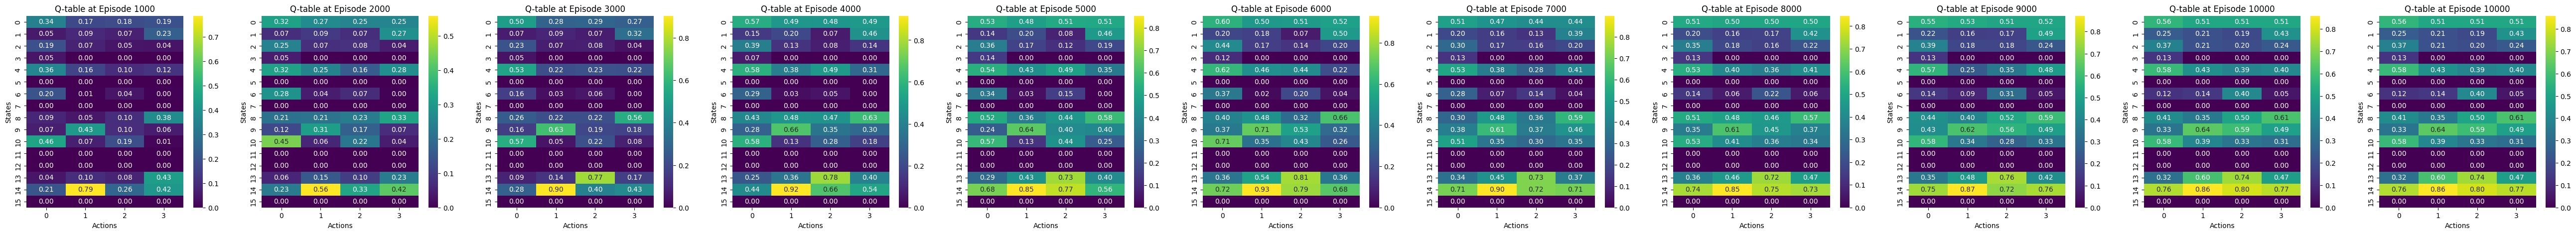

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Determine the number of snapshots
num_snapshots = len(q_table_snapshots)

# Create a figure with subplots in a single row
fig, axes = plt.subplots(1, num_snapshots, figsize=(num_snapshots * 6, 5)) # Adjust figsize as needed

# Iterate through the q_table_snapshots list and the axes
for i, snapshot in enumerate(q_table_snapshots):
    # Use seaborn.heatmap() to generate a heatmap in the current subplot
    sns.heatmap(snapshot, annot=True, fmt=".2f", ax=axes[i], cmap="viridis")

    # Calculate the episode number for the title
    if i < num_snapshots - 1:
        episode_number = (i + 1) * snapshot_interval
    else:
        episode_number = num_episodes # The last snapshot is at the end of training

    # Set the title of the heatmap
    axes[i].set_title(f'Q-table at Episode {episode_number}')

    # Label the x-axis and y-axis
    axes[i].set_xlabel('Actions')
    axes[i].set_ylabel('States')

# plt.tight_layout()
# display(fig)

## Análisis y explicación
Analizar los mapas de calor y explicar cómo los cambios en los parámetros reflejan el proceso de aprendizaje del modelo.


**Reasoning**:
Analizo los heapmaps generados para explicar los cambios en los Q-values del modelo durante el proceso de aprendizaje, vinculando estos cambios a la exploración y explotación, y la convergencia.

## Análisis de los mapas de calor de la tabla Q para comprender el proceso de aprendizaje en FrozenLake:

El entorno FrozenLake-v1 tiene una cuadrícula de 4x4 que representa diferentes estados. Los estados están indexados de 0 a 15, comenzando desde la esquina superior izquierda y moviéndose horizontalmente. Las acciones posibles son: 0 (Izquierda), 1 (Abajo), 2 (Derecha), 3 (Arriba).

## Observación 1:
### Mapa de calor inicial (Episodio 0)

Al comienzo del entrenamiento (Episodio 0), el mapa de calor muestra que todos los valores Q se inicializan a 0. Esto indica que el agente no tiene conocimiento previo del entorno ni del valor de realizar cualquier acción en cualquier estado. Por ejemplo, el valor Q para el estado 0 (inicio) y la acción 0 (Izquierda) es 0. El agente comienza explorando aleatoriamente.

## Observación 2:
### Cambios en los mapas de calor durante el entrenamiento (p. ej., Episodio 1000, 2000, etc.)
A medida que avanza el entrenamiento, se pueden observar cambios en los valores Q. Algunas celdas del mapa de calor comenzarán a mostrar valores distintos de cero. Estos cambios son resultado directo de la exploración del entorno por parte del agente, la realización de acciones, la recepción de recompensas (o penalizaciones) y la actualización de su tabla Q según el algoritmo de aprendizaje Q.

Regla de actualización de Q-learning:

`Q(s, a) = Q(s, a) + alfa * (recompensa + gamma * máx.(Q(s', a')) - Q(s, a))`

* Esta fórmula muestra que el valor Q de un par estado-acción (s, a) se actualiza en función de la recompensa recibida y la recompensa futura máxima estimada del siguiente estado (s').
* Al principio del entrenamiento, debido a un épsilon alto, el agente explora más, probando diferentes acciones incluso si no parecen óptimas según los valores Q actuales. Por ejemplo, en los primeros episodios, el agente podría probar la acción "Arriba" (3) en el estado inicial (0), incluso si no es la dirección más prometedora.
* A medida que épsilon decae, el agente comienza a explotar más, eligiendo acciones con valores Q más altos. Verá que los valores Q aumentan para las acciones que conducen a estados con mayores recompensas (como el estado objetivo, que es el estado 15 en FrozenLake) y potencialmente disminuyen para las acciones que conducen a penalizaciones o estados indeseables (como caer en un agujero). Por ejemplo, el valor Q para la acción "Abajo" (1) en el estado 0 probablemente aumentará con el tiempo a medida que el agente descubra que moverse hacia abajo lo acerca a estados más gratificantes. De manera similar, si el estado 5 es un agujero, el valor Q para cualquier acción que lleve al agente al estado 5 (por ejemplo, la acción "Derecha" (2) desde el estado 4) probablemente disminuirá.

## Observación 3:
### Convergencia en Mapas de Calor Posteriores (p. ej., Episodio 9000, 10000)

* En los mapas de calor posteriores, debería empezar a observar cierta convergencia en los valores Q, especialmente en los estados cercanos al objetivo (estado 15). Los valores Q para las acciones óptimas en estos estados se volverán relativamente altos y estables. Por ejemplo, en los estados inmediatamente adyacentes al objetivo, como el estado 14, el valor Q de la acción que lleva directamente al estado 15 (la acción "Derecha" (2)) se volverá significativamente más alto que las otras acciones. En el estado 11, la acción "Abajo" (1) que lleva al estado 15 también mostrará un valor Q alto.
* Esta convergencia indica que el modelo ha aprendido una política (una correlación de estados a acciones) cercana a la óptima para navegar por el lago helado. El agente ha aprendido qué acciones son las mejores para tomar en diferentes estados para maximizar su recompensa acumulada (llegar al objetivo sin caer en un agujero).
* Los mapas de calor representan visualmente la función de valor aprendido. Los valores Q más altos (representados por diferentes colores según el mapa de colores) sugieren que se estima que realizar una acción específica en un estado específico generará una recompensa total futura mayor.

## Conclusión:
Al examinar la secuencia de mapas de calor, los estudiantes pueden ver el proceso de aprendizaje por refuerzo en acción dentro del entorno FrozenLake. Los mapas de calor ilustran:
1. Ignorancia inicial (todos ceros).
2. Exploración y aprendizaje gradual mediante la interacción con el entorno (valores cambiantes según las recompensas), mostrando qué acciones en qué estados se vuelven más valiosas.
3. El cambio de la exploración a la explotación (decaimiento épsilon).
4. La convergencia de los valores Q a medida que el modelo aprende una política casi óptima para navegar por el lago helado y alcanzar el objetivo.
Los cambios visuales en los mapas de calor se corresponden directamente con la representación interna del modelo de la dinámica del entorno y la estructura de recompensas, mostrando cómo aprende a navegar para alcanzar su objetivo.

## Resumen:

### Data Analysis Key Findings

*   The Q-table was successfully initialized with zeros, reflecting the agent's initial lack of knowledge about the environment.
*   The Q-learning model was trained for 10,000 episodes using the epsilon-greedy strategy for action selection and the standard Q-learning update rule.
*   Snapshots of the Q-table were captured and stored every 1000 episodes, plus the final Q-table, resulting in 11 snapshots.
*   Heatmaps were generated for each Q-table snapshot, visually representing the evolution of Q-values across different states and actions throughout the training process.
*   The heatmaps show the transition from initial zero values to changing non-zero values as the agent explores and learns from interactions, eventually converging towards stable values that represent a learned policy.

### Insights or Next Steps

*   The generated heatmaps provide a clear visual demonstration of how the Q-values change over time, effectively illustrating the exploration and exploitation phases and the convergence of the learning algorithm.
*   Future steps could involve comparing heatmaps generated with different Q-learning hyperparameters (e.g., learning rate, discount factor, epsilon decay) to show students how these parameters influence the learning speed and final policy.
